In [8]:
import time
import george
import numpy as np
import pandas as pd
import seaborn as sns
from extinction import fm07
import matplotlib.pyplot as plt
from ztfidr import get_sample, typing
from astropy.cosmology import Planck15
from scipy.optimize import minimize, curve_fit
from sn_code import SNe_GP2, AnalyseSN, FitSpectra

sns.set_style('darkgrid')
sn_typing = typing.Classifications().data
sample = get_sample()
data_2 = pd.read_csv('sn_values.csv')

Text(0, 0.5, 'flux')

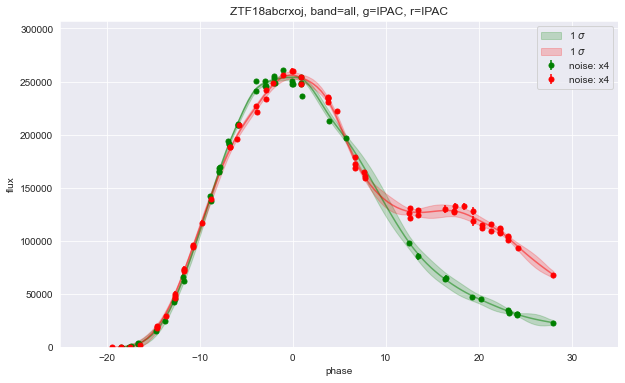

In [14]:
# Gaussian process
target = 'ZTF18abcrxoj' 
sn_test = SNe_GP2(target, sample.data, sample, (20, 30), photo_cuts=photo_cuts, lccf=True)
sn_test.new_pipeline(band='g', density=100, timescale=30, noise_amp=1, recursive=True, use_range=False)
sn_test.new_pipeline(band='r', density=100, timescale=30, noise_amp=1, recursive=True, use_range=False)
fig, ax = sn_test.show('all', show_lines=False)
ax.set_xlabel('phase')
ax.set_ylabel('flux')

(<Figure size 1152x1296 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object),
 18)

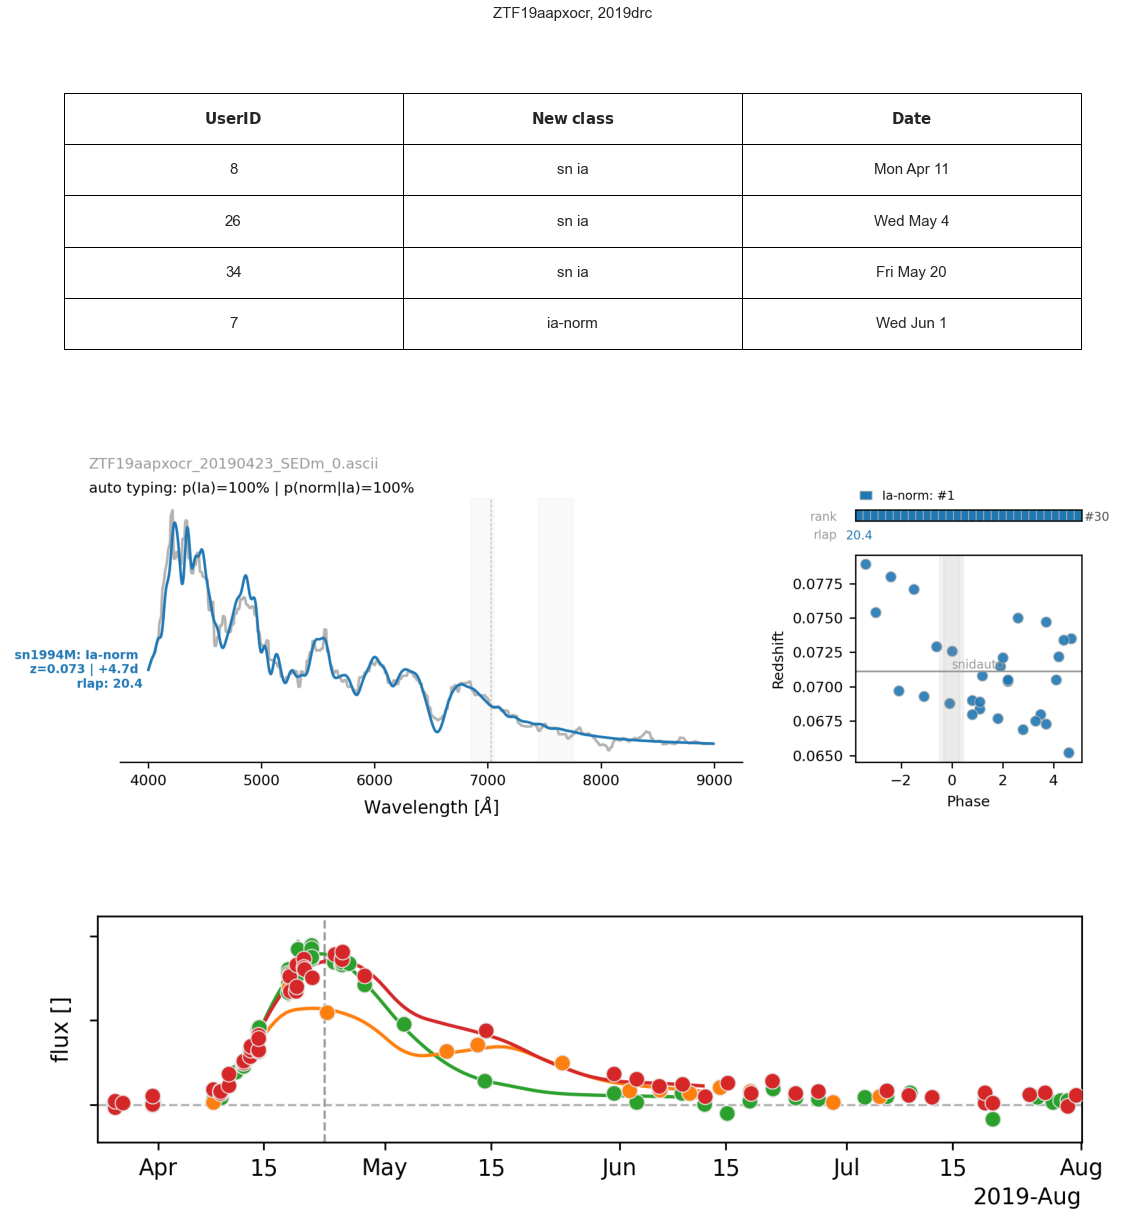

In [12]:
stest = AnalyseSN('ZTF19aapxocr', sn_typing, sample)
stest.show()

(0.0, 3e-16)

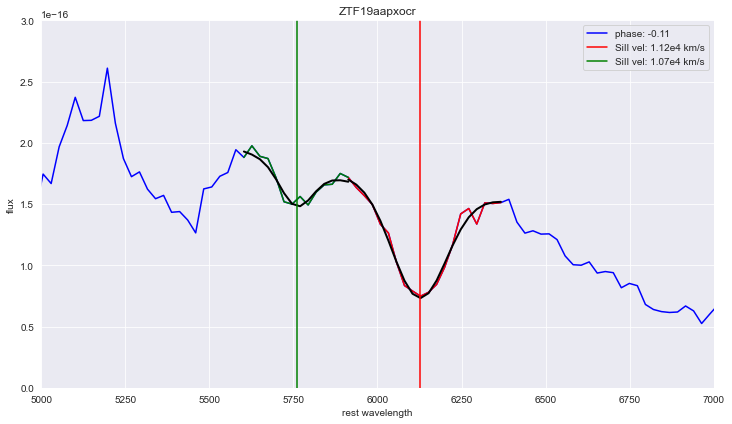

In [10]:
target = 'ZTF19aapxocr'
spec_test = FitSpectra(target, sample, [-18000, -6000], [-16000, -2000], recursion=[True, True], sigma=2)
fig, ax = spec_test.show_gui((10, 6))
ax.set_xlim([5000, 7000])
ax.set_ylim([0, 3e-16])